# Homework 07

Predict the next letter.

1. Read the file HP1_words.txt. you can use
```python
f = open("HP1_words.txt", mode="r", encoding="utf-8")
txt = f.read()
f.close()
```
to read the content into the string txt. The file contains only the words in lowercase lettersmof the first Harry Potter book.
2. Convert the text to one hot encoding. `ord(txt[i])` gives you the ascii code of the specific characters. There are 27 different characters in the file: letters from a-z and the space. `ord(txt[i]) - ord("a")` gives you a code from 0 to 25 for each letter, you have to set space to 26
Create an array which is as long as the string txt and is 27 wide. Put 1 only at the code of the character in each row of the array.
3. Create a train and test dataset. Note that you have to modify the create_dataset function used in course because now you need all 27 columns.
4. First use only 1% of the dataset for training
5. Create an LSTM-Dense network and train with the data.
6. Experiment with look_back and number of LSTM cells and even layers and try to reach more than 90% accuracy on this training set. Show with the rest of the data that you have overfitted the data.
7. Now use 10% of the data (training may take 10-20 minutes) and fit the data so that you achieve more than 40% on the test data

In [44]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Helper Functions

In [5]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

In [6]:
# https://www.kaggle.com/danbrice/keras-plot-history-full-report-and-grid-search
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Homework

In [2]:
f = open("HP1_words.txt", mode="r", encoding="utf-8")
txt = f.read()
f.close()

txt[:250]

'the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold'

In [74]:
text_length = len(txt)

encoded = np.zeros((text_length, 27), dtype=int)

for i in range(text_length):
  code = 26 if txt[i] == ' ' else ord(txt[i]) - ord("a")
  encoded[i][code] = 1

encoded.shape

(414125, 27)

### Using 1% of the dataset

In [40]:
look_back = 16

train_size = round(len(encoded) * 0.01)
train, test = encoded[0:train_size,:], encoded[train_size:len(encoded),:]
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX.shape, trainY.shape)

(4124, 16, 27) (4124, 27)


In [41]:
model = Sequential()
model.add(LSTM(120, input_shape=(look_back, 27)))
model.add(Dense(60))
model.add(Dense(27))
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 120)               71040     
                                                                 
 dense_21 (Dense)            (None, 60)                7260      
                                                                 
 dense_22 (Dense)            (None, 27)                1647      
                                                                 
Total params: 79,947
Trainable params: 79,947
Non-trainable params: 0
_________________________________________________________________


Epoch 1/120
104/104 [==============================] - 7s 28ms/step - loss: 0.1795 - accuracy: 0.1857
Epoch 2/120
104/104 [==============================] - 2s 23ms/step - loss: 0.1565 - accuracy: 0.2335
Epoch 3/120
104/104 [==============================] - 3s 25ms/step - loss: 0.1501 - accuracy: 0.2638
Epoch 4/120
104/104 [==============================] - 3s 27ms/step - loss: 0.1500 - accuracy: 0.2769
Epoch 5/120
104/104 [==============================] - 3s 25ms/step - loss: 0.1453 - accuracy: 0.3009
Epoch 6/120
104/104 [==============================] - 3s 26ms/step - loss: 0.1441 - accuracy: 0.3080
Epoch 7/120
104/104 [==============================] - 3s 24ms/step - loss: 0.1412 - accuracy: 0.3196
Epoch 8/120
104/104 [==============================] - 2s 23ms/step - loss: 0.1398 - accuracy: 0.3252
Epoch 9/120
104/104 [==============================] - 3s 25ms/step - loss: 0.1399 - accuracy: 0.3332
Epoch 10/120
104/104 [==============================] - 3s 25ms/step - loss: 0.136

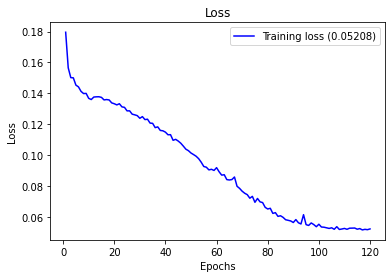

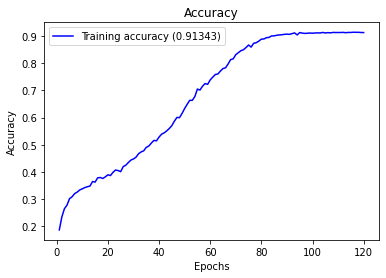

In [42]:
history = model.fit(trainX, trainY, batch_size=40, epochs=120, verbose=1)

plot_history(history)

In [43]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = trainPredict.argmax(axis = 1)
trainValues = trainY.argmax(axis = 1)

testPredict = testPredict.argmax(axis = 1)
testValues = testY.argmax(axis = 1)

12812/12812 [==============================] - 141s 11ms/step


Train Acuracy: 0.9117361784675073


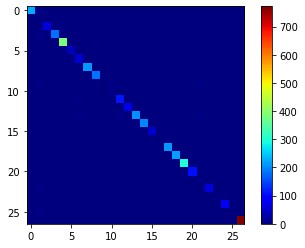

In [49]:
cm = metrics.confusion_matrix(trainPredict, trainValues)
plt.imshow(cm,cmap='jet')
plt.colorbar()
print('Train Acuracy:', metrics.accuracy_score(trainPredict, trainValues))

Test Acuracy: 0.2781150677981398


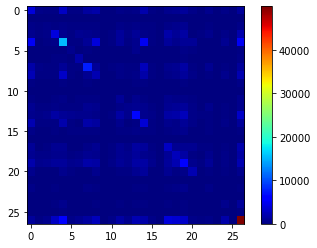

In [52]:
cm = metrics.confusion_matrix(testPredict, testValues)
plt.imshow(cm,cmap='jet')
plt.colorbar()
print('Test Acuracy:', metrics.accuracy_score(testPredict, testValues))

As we can see from the previous cells, even though the training accuracy was above 90%, the testing accuracy was very low, around 27%, which means that the model was extremely overfited to the training data. Otherwise, the testing score would be much higher, closer to the training one.

### Train with 10% of dataset

In [61]:
look_back = 16

train_size = round(len(encoded) * 0.1)
train, test = encoded[0:train_size,:], encoded[train_size:len(encoded),:]
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(41395, 16, 27) (41395, 27)
(372696, 16, 27) (372696, 27)


In [62]:
model = Sequential()
model.add(LSTM(120, input_shape=(look_back, 27)))
model.add(Dense(60))
model.add(Dense(27))
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 120)               71040     
                                                                 
 dense_29 (Dense)            (None, 60)                7260      
                                                                 
 dense_30 (Dense)            (None, 27)                1647      
                                                                 
Total params: 79,947
Trainable params: 79,947
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
1035/1035 [==============================] - 31s 27ms/step - loss: 0.1832 - accuracy: 0.2629
Epoch 2/50
1035/1035 [==============================] - 27s 26ms/step - loss: 0.1735 - accuracy: 0.3084
Epoch 3/50
1035/1035 [==============================] - 27s 26ms/step - loss: 0.1672 - accuracy: 0.3286
Epoch 4/50
1035/1035 [==============================] - 28s 27ms/step - loss: 0.1679 - accuracy: 0.3570
Epoch 5/50
1035/1035 [==============================] - 25s 25ms/step - loss: 0.1665 - accuracy: 0.3756
Epoch 6/50
1035/1035 [==============================] - 26s 25ms/step - loss: 0.1647 - accuracy: 0.3980
Epoch 7/50
1035/1035 [==============================] - 27s 27ms/step - loss: 0.1653 - accuracy: 0.4108
Epoch 8/50
1035/1035 [==============================] - 26s 25ms/step - loss: 0.1659 - accuracy: 0.4279
Epoch 9/50
1035/1035 [==============================] - 27s 26ms/step - loss: 0.1655 - accuracy: 0.4384
Epoch 10/50
1035/1035 [==============================] - 26s 25m

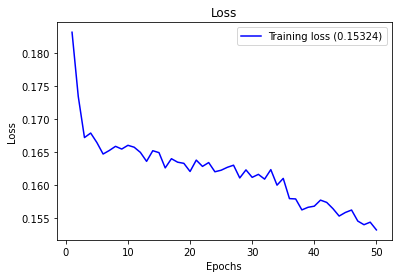

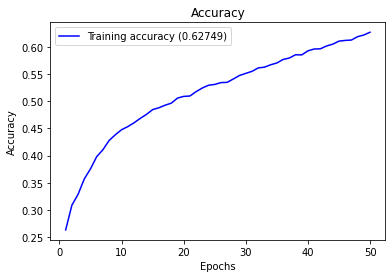

In [63]:
history = model.fit(trainX, trainY, batch_size=40, epochs=50, verbose=1)

plot_history(history)

In [64]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = trainPredict.argmax(axis = 1)
trainValues = trainY.argmax(axis = 1)

testPredict = testPredict.argmax(axis = 1)
testValues = testY.argmax(axis = 1)

11647/11647 [==============================] - 109s 9ms/step


Train Acuracy: 0.6409711317792004


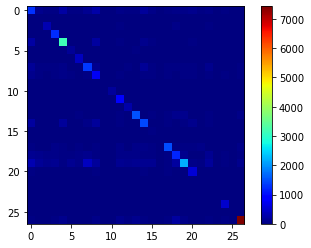

In [65]:
cm = metrics.confusion_matrix(trainPredict, trainValues)
plt.imshow(cm,cmap='jet')
plt.colorbar()
print('Train Acuracy:', metrics.accuracy_score(trainPredict, trainValues))

Test Acuracy: 0.46527464743383345


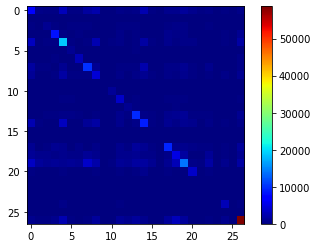

In [66]:
cm = metrics.confusion_matrix(testPredict, testValues)
plt.imshow(cm,cmap='jet')
plt.colorbar()
print('Test Acuracy:', metrics.accuracy_score(testPredict, testValues))

As we can see from the results, training with 10% of the data leads to much better results, with the accuracy for the test data being above 46%.